# Table of Content:
## 1. Packages and Data Importing

## 2. Data Exploration
### 2.1. Dataset Description
#### 2.1.1 Data types
#### 2.1.2 Data summary
#### 2.1.3 Data Quality Report 
### 2.2. Cancelled Flights
### 2.3. Diverted Flights
### 2.4. Percentage of Diverted & Cancelled Flights
### 2.5. Delayed Flights

## 3. Data Preprocessing
### 3.1. Create column for date
### 3.2. Data Cleansing

## 4. Data Visualisation
### 4.1. Departure and Arrival time
### 4.2. Percentage of Delayed Flights Per Airline
### 4.3. Average delay per airline per reason (Security, Aircraft, Weather, Airline, Air system)
#### 4.3.1. Total number of delayed per reason per airline
#### 4.3.2. Total number of delayed minutes per reason per airline
#### 4.3.3 Average number of delayed minutes per reason per airline
### 4.4. Delay reasons in details
#### 4.4.1 - Delay Due Security
#### 4.4.2 Delay Due Aircraft
#### 4.4.3 Delay Due Weather
#### 4.4.4. Delay Due Air System
#### 4.4.5. Delay Due Airline

## 4.5. Average delay per airline split by shift time (Morning, Afternoon, Noon, Night)

## 4.6. Average Taxi_in per origion airport and Taxi_out per destination airport

### 4.6.1 Average Taxi_in per origion airport
### 4.6.2 Average Taxi_out per destination airport

## 4.7. Count delays per season



# 1. Packages and Data Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

In [3]:
flights =  pd.read_csv('flight-delays/full_data.csv')
flights.shape

(5819079, 46)

In [4]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'date', 'delayed',
       'FlightsShift', 'SEASON', 'ORIGIN_AIRPORT_NAME', 'ORIGIN_CITY',
       'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DESTINATION_AIRPORT_NAME', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE', 'AIRLINE NAME'],
      dtype='object')

In [5]:
flights.sample(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,AIRLINE NAME
1344084,2015,6,6,6,UA,1162,N61881,BQN,EWR,155,...,Aguadilla,PR,18.49486,-67.12944,Newark Liberty International Airport,Newark,NJ,40.69250,-74.16866,United Air Lines Inc.
2697740,2015,5,18,1,UA,703,N502UA,JFK,LAX,1125,...,New York,NY,40.63975,-73.77893,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,United Air Lines Inc.
644111,2015,12,26,6,AS,605,N518AS,LAS,SEA,1300,...,Las Vegas,NV,36.08036,-115.15233,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Alaska Airlines Inc.


## 2. Data Exploration
### 2.1. Dataset Description

##### 1 - Data Type :

In [6]:
flights.dtypes

YEAR                          int64
MONTH                         int64
DAY                           int64
DAY_OF_WEEK                   int64
AIRLINE                      object
FLIGHT_NUMBER                 int64
TAIL_NUMBER                  object
ORIGIN_AIRPORT               object
DESTINATION_AIRPORT          object
SCHEDULED_DEPARTURE           int64
DEPARTURE_TIME              float64
DEPARTURE_DELAY             float64
TAXI_OUT                    float64
WHEELS_OFF                  float64
SCHEDULED_TIME              float64
ELAPSED_TIME                float64
AIR_TIME                    float64
DISTANCE                      int64
WHEELS_ON                   float64
TAXI_IN                     float64
SCHEDULED_ARRIVAL             int64
ARRIVAL_TIME                float64
ARRIVAL_DELAY               float64
DIVERTED                      int64
CANCELLED                     int64
CANCELLATION_REASON          object
AIR_SYSTEM_DELAY            float64
SECURITY_DELAY              

##### 2 - Data Summary :

In [7]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delayed,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,5.819079e+06,5.814071e+06,5.814071e+06,5.814067e+06,5.814067e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00,2.217284e-01,3.664960e+01,-9.549179e+01,3.664936e+01,-9.549169e+01
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01,4.154094e-01,5.988646e+00,1.814704e+01,5.988688e+00,1.814690e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.348345e+01,-1.766460e+02,1.348345e+01,-1.766460e+02
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.289595e+01,-1.119778e+02,3.289595e+01,-1.119778e+02
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,3.736186e+01,-9.025803e+01,3.736186e+01,-9.025803e+01
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00,0.000000e+00,4.078839e+01,-8.168786e+01,4.078839e+01,-8.168786e+01
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,1.000000e+00,7.128545e+01,-6.479856e+01,7.128545e+01,-6.479856e+01


##### 3 - Data Quality Report :

In [8]:
# To creat data quality report:

# 1. Discover column data types:
data_types = pd.DataFrame(flights.dtypes,
                          columns=['Data Type'])

#2. Count missing data:
missing_data_counts = pd.DataFrame(flights.isnull().sum(),
                                   columns=['Missing Values'])

#3. Count present data:
present_data_counts = pd.DataFrame(flights.count(),
                                   columns=['Present Values'])

#4. Count unique data:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(flights.columns.values):
    unique_value_counts.loc[v] = [flights[v].nunique()]

#5. Create the report:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)

#6. Print the report:
print("\nData Quality Report")
print("Total records: {}".format(len(flights.index)))
data_quality_report


Data Quality Report
Total records: 5819079


,Data Type,Present Values,Missing Values,Unique Values
YEAR,int64,5819079,0,1
MONTH,int64,5819079,0,12
DAY,int64,5819079,0,31
DAY_OF_WEEK,int64,5819079,0,7
AIRLINE,object,5819079,0,14
FLIGHT_NUMBER,int64,5819079,0,6952
TAIL_NUMBER,object,5804358,14721,4897
ORIGIN_AIRPORT,object,5819079,0,322
DESTINATION_AIRPORT,object,5819079,0,322
SCHEDULED_DEPARTURE,int64,5819079,0,1321


### 2.2. Cancelled Flights

In [9]:
flights.groupby(flights.CANCELLED).CANCELLED.count()

CANCELLED
0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [10]:
# percentage of cancelled flights over all

cancelled = flights[flights.CANCELLED==1].FLIGHT_NUMBER.count()
print ('Cancelled Flights:',cancelled, ' %',round(cancelled/len(flights)*100))

Cancelled Flights: 89884  % 2.0


In [11]:
# percentage of Departed/Non-Cancelled flights over all

departed = flights[flights.CANCELLED==0].FLIGHT_NUMBER.count()
print ('Non-Cancelled Flights:',departed, ' %',round(departed/len(flights)*100))

Non-Cancelled Flights: 5729195  % 98.0


In [12]:
# CANCELLED flights that have not an actual DEPARTURE time

len(flights[(flights.CANCELLED == 1) & (flights.DEPARTURE_TIME.isnull() == True)])

86153

In [13]:
# CANCELLED flights that have an actual DEPARTURE time

len(flights[(flights.CANCELLED==1) & (flights.DEPARTURE_TIME.notnull()==True)])

3731

In [14]:
# CANCELLED flights that have not an actual ARRIVAL time

len(flights[(flights.CANCELLED == 1) & (flights.ARRIVAL_TIME.isnull() == True)])

89884

In [15]:
# CANCELLED flights that have an actual ARRIVAL time

len(flights[(flights.CANCELLED == 1) & (flights.ARRIVAL_TIME.notnull()==True)])

0

### 2.3. Diverted Flights

In [16]:
flights.groupby(flights.DIVERTED).DIVERTED.count()

DIVERTED
0    5803892
1      15187
Name: DIVERTED, dtype: int64

In [17]:
# percentage of diverted flights over all

Diverted = flights[flights.DIVERTED==1].FLIGHT_NUMBER.count()
print ('Diverted Flights:',Diverted, ' %',round(Diverted/len(flights)*100,2))

Diverted Flights: 15187  % 0.26


In [18]:
# percentage of Non-Diverted flights over all

non_diverted = flights[flights.DIVERTED==0].FLIGHT_NUMBER.count()
print ('Non-Diverted Flights:',non_diverted, ' %',round(non_diverted/len(flights)*100,2))

Non-Diverted Flights: 5803892  % 99.74


In [19]:
# DIVERTED flights that have not an actual DEPARTURE time

len(flights[(flights.DIVERTED == 1) & (flights.DEPARTURE_TIME.isnull() == True)])

0

In [20]:
# DIVERTED flights that have an actual DEPARTURE time

len(flights[(flights.DIVERTED==1) & (flights.DEPARTURE_TIME.notnull()== True)])

15187

In [21]:
# DIVERTED flights that have not an actual ARRIVAL time

len(flights[(flights.DIVERTED == 1) & (flights.ARRIVAL_TIME.isnull() == True)])

2629

In [22]:
# DIVERTED flights that have an actual ARRIVAL time

len(flights[(flights.DIVERTED == 1) & (flights.ARRIVAL_TIME.notnull()== True)])

12558

### 2.4. Percentage of Diverted & Cancelled Flights

In [23]:
# percentage of diverted or Cancelled flights over all

Divert_Cancel = flights[(flights.CANCELLED == 1) | (flights.DIVERTED==1)].FLIGHT_NUMBER.count()
print ('Diverted Flights:',Divert_Cancel, ' %',round(Divert_Cancel/len(flights)*100,2))

Diverted Flights: 105071  % 1.81


## 3. Xxxxxxx

In [24]:
DEPARTURE_TIME_missing = flights.DEPARTURE_TIME.isnull().sum()
print ('Missing values of departure time:', DEPARTURE_TIME_missing, ' %',round(DEPARTURE_TIME_missing/len(flights)*100))

Missing values of departure time: 86153  % 1.0


In [25]:
ARRIVAL_TIME_missing = flights.ARRIVAL_TIME.isnull().sum()
print ('Missing values of arrival time:', ARRIVAL_TIME_missing, ' %',round(ARRIVAL_TIME_missing/len(flights)*100))

Missing values of arrival time: 92513  % 2.0


## 4. Data Visualisation
### 4.1. Departure and Arrival time

''

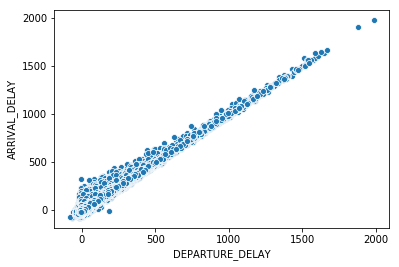

In [26]:
# plot relationship Actual DEPARTUR time & Actual ARRIVAL time

ax = sns.scatterplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=flights)
;

### 4.2. Percentage of Delayed Flights Per Airline

In [35]:
# 1- Calculate number of flights per each airline
# FD: flights distribution
FD = pd.DataFrame(flights.groupby(flights['AIRLINE NAME']).FLIGHT_NUMBER.count())


# 2- Calculate number of delayed flights per each airline
# FDD: flights delay distribution
FDD = pd.DataFrame(flights[flights['delayed']==1].groupby(flights['AIRLINE NAME']).FLIGHT_NUMBER.count())


# 3- Calculate the average delay time per each airline for Departure & Arrival
Delay_Average = flights[flights['delayed']==1].groupby(flights['AIRLINE NAME'])\
                ['ARRIVAL_DELAY','DEPARTURE_DELAY'].mean()

# 4- Join the results of delays summary per airline
# FAD : flights airlines delays
FAD = pd.concat([FD,FDD,Delay_Average],axis=1)
FAD.reset_index(level=0, inplace=True)
FAD.columns = ['Airline_Name', 'Flights_Number','Delays_Number','Arrival_Delay','Departure_Delay']


# 5- Calculate delays percentage per airline
FAD['Delay_Percent'] = FAD.apply(lambda x: round(x['Delays_Number']/x['Flights_Number']*100,2),axis=1)
# FAD.sort_values('Delay_Percent', ascending=[0])

In [36]:
FAD

,Airline_Name,Flights_Number,Delays_Number,Arrival_Delay,Departure_Delay,Delay_Percent
0,Alaska Airlines Inc.,172521,26082,42.020934,38.579212,15.12
1,American Airlines Inc.,725984,157916,50.755276,49.425226,21.75
2,American Eagle Airlines Inc.,294632,69644,56.131080,50.912397,23.64
3,Atlantic Southeast Airlines,571977,123504,56.748352,52.847260,21.59
4,Delta Air Lines Inc.,875881,152246,48.691881,49.562918,17.38
5,Frontier Airlines Inc.,90836,26442,60.787600,55.653997,29.11
6,Hawaiian Airlines Inc.,76272,9119,37.818232,29.828490,11.96
7,JetBlue Airways,267048,70555,52.170886,50.813578,26.42
8,Skywest Airlines Inc.,588353,122540,54.300360,51.438657,20.83
9,Southwest Airlines Co.,1261855,298276,43.040554,45.763843,23.64


''

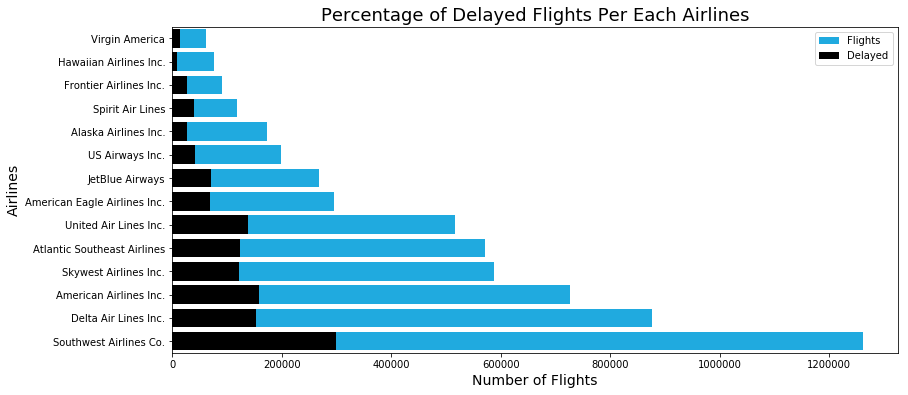

In [37]:
# plot the Percentage of Delayed Flights Per Airline

plt.figure(figsize=(13,6))

#sns.set_color_codes("pastel")
ax = sns.barplot(y='Airline_Name',x='Flights_Number',data=FAD.sort_values('Flights_Number', ascending=[1]),\
            label="Flights",color = '#00b8ff')

#sns.set_color_codes("muted")
ax = sns.barplot(y='Airline_Name',x='Delays_Number',data=FAD.sort_values('Flights_Number', ascending=[1]),\
            label="Delayed",color = '#000000')


plt.legend(loc='upper right')
plt.title('Percentage of Delayed Flights Per Each Airlines',fontsize=18)
plt.xlabel("Number of Flights",fontsize=14)
plt.ylabel("Airlines",fontsize=14)
;

### 4.3. Average delay per airline per reason (Security, Aircraft, Weather, Airline, Air system)

In [38]:
# Selecting/filtering the delayed flights records by a reason;  and put in a Pandas Dataframe

delayed_reasons = flights[(flights.AIR_SYSTEM_DELAY >=1)|\
              (flights.SECURITY_DELAY >=1)|\
              (flights.AIRLINE_DELAY >=1)|\
              (flights.LATE_AIRCRAFT_DELAY >=1)|\
              (flights.WEATHER_DELAY >=1)].copy()

len(delayed_reasons)

1063439

In [39]:
delayed_reasons.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,AIRLINE NAME
28,2015,1,1,4,UA,1197,N73251,ANC,SFO,1605,...,Anchorage,AK,61.17432,-149.99619,San Francisco International Airport,San Francisco,CA,37.6190,-122.37484,United Air Lines Inc.
32,2015,1,1,4,UA,1562,N36247,ANC,ORD,2023,...,Anchorage,AK,61.17432,-149.99619,Chicago O'Hare International Airport,Chicago,IL,41.9796,-87.90446,United Air Lines Inc.


In [49]:
# 1- Total delays minutes per reason per airline
sum_delayed_reasons = delayed_reasons.groupby(flights['AIRLINE NAME'])[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',\
                                 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY',]].sum()
# rename columns to relevant names
sum_delayed_reasons.columns = ['AIR_SYSTEM_Sum','SECURITY_Sum','AIRLINE_Sum','AIRCRAFT_Sum','WEATHER_Sum']


# 2- average delays minutes per reason per airline
average_delayed_reasons = delayed_reasons.groupby(flights['AIRLINE NAME'])[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',\
                                 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].mean()
# rename columns to relevant names
average_delayed_reasons.columns = ['AIR_SYSTEM_Avg','SECURITY_Avg','AIRLINE_Avg','AIRCRAFT_Avg','WEATHER_Avg']

# 3- Calculate number of delays because of AIR_SYSTEM  per airline
AIR_SYSTEM= pd.DataFrame(delayed_reasons[delayed_reasons.AIR_SYSTEM_DELAY >=1].groupby('AIRLINE NAME').FLIGHT_NUMBER.count())
# rename the columns to relevant name
AIR_SYSTEM.columns = ['AIR_SYSTEM_cnt']

# 4- Calculate number of delays per because of SECURITY  per airline
SECURITY= pd.DataFrame(delayed_reasons[delayed_reasons.SECURITY_DELAY >=1].groupby('AIRLINE NAME').FLIGHT_NUMBER.count())
# rename the columns to relevant name
SECURITY.columns = ['SECURITY_cnt']

# 5- Calculate number of delays because of AIRLINE  per airline
AIRLINE = pd.DataFrame(delayed_reasons[delayed_reasons.AIRLINE_DELAY >=1].groupby('AIRLINE NAME').FLIGHT_NUMBER.count())
# rename the columns to relevant name
AIRLINE.columns = ['AIRLINE_cnt']

# 6- Calculate number of delays because of AIRCRAFT  per airline
AIRCRAFT = pd.DataFrame(delayed_reasons[delayed_reasons.LATE_AIRCRAFT_DELAY >=1].groupby('AIRLINE NAME').FLIGHT_NUMBER.count())
# rename the columns to relevant name
AIRCRAFT.columns = ['AIRCRAFT_cnt']

# 7- Calculate number of delays because of WEATHER  per airline
WEATHER = pd.DataFrame(delayed_reasons[delayed_reasons.WEATHER_DELAY >=1].groupby('AIRLINE NAME').FLIGHT_NUMBER.count())
# rename the columns to relevant name
WEATHER.columns = ['WEATHER_cnt']

# 8- Join the results of delays summary per reson per airline
# DRS : delayed_reasons_summary
DRS_list = [AIR_SYSTEM, SECURITY, AIRLINE, AIRCRAFT, WEATHER, sum_delayed_reasons, average_delayed_reasons]
DRS = pd.concat(DRS_list,axis=1)
DRS = DRS.reset_index(level=0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [51]:
DRS.columns = ['AIRLINE_NAME','AIR_SYSTEM_cnt','SECURITY_cnt','AIRLINE_cnt','AIRCRAFT_cnt',
'WEATHER_cnt','AIR_SYSTEM_Sum','SECURITY_Sum','AIRLINE_Sum','AIRCRAFT_Sum',
'WEATHER_Sum','AIR_SYSTEM_Avg','SECURITY_Avg','AIRLINE_Avg','AIRCRAFT_Avg','WEATHER_Avg']

DRS

,AIRLINE_NAME,AIR_SYSTEM_cnt,SECURITY_cnt,AIRLINE_cnt,AIRCRAFT_cnt,WEATHER_cnt,AIR_SYSTEM_Sum,SECURITY_Sum,AIRLINE_Sum,AIRCRAFT_Sum,WEATHER_Sum,AIR_SYSTEM_Avg,SECURITY_Avg,AIRLINE_Avg,AIRCRAFT_Avg,WEATHER_Avg
0,Alaska Airlines Inc.,14897,250.0,8363,7866,867,301478.0,5825.0,347425.0,381417.0,38832.0,13.487742,0.260603,15.543352,17.064111,1.737294
1,American Airlines Inc.,70383,731.0,68656,57590,9967,1760561.0,16158.0,2753994.0,2833302.0,467420.0,13.513774,0.124026,21.139201,21.747956,3.587838
2,American Eagle Airlines Inc.,35806,308.0,27236,32125,9105,930774.0,7049.0,1055033.0,1417073.0,402305.0,15.372752,0.116422,17.425025,23.404512,6.644508
3,Atlantic Southeast Airlines,63586,NaN,53943,54804,2852,1687894.0,0.0,2363973.0,2628976.0,169313.0,15.459170,0.000000,21.651277,24.078400,1.550713
4,Delta Air Lines Inc.,64230,58.0,63128,50112,11838,1779383.0,3910.0,2707569.0,2136128.0,602901.0,15.076578,0.033129,22.941028,18.099252,5.108335
5,Frontier Airlines Inc.,18066,NaN,11517,11638,580,581234.0,0.0,346950.0,634039.0,21616.0,24.659907,0.000000,14.719983,26.900255,0.917098
6,Hawaiian Airlines Inc.,325,29.0,7395,4877,572,6241.0,401.0,196422.0,126699.0,11429.0,0.724182,0.046531,22.792063,14.701671,1.326178
7,JetBlue Airways,33913,433.0,38665,31684,2173,991461.0,11417.0,1074056.0,1417496.0,115770.0,16.754728,0.192936,18.150503,23.954305,1.956401
8,Skywest Airlines Inc.,58509,345.0,39127,62432,4426,1333972.0,9896.0,2043703.0,2868684.0,250325.0,12.375082,0.091804,18.959163,26.612403,2.322232
9,Southwest Airlines Co.,97772,554.0,144524,163188,10086,1669198.0,11888.0,3831371.0,6313558.0,545369.0,7.054161,0.050240,16.191674,26.681590,2.304772


#### 4.3.1. Total number of delayed per reason per airline

In [52]:
# change the df structure to be : airline|delay_reason|number_flights 
# ADRC = Airline delay reasons count 
ADRC = pd.melt(DRS[['AIR_SYSTEM_cnt','SECURITY_cnt','AIRLINE_cnt','AIRCRAFT_cnt','WEATHER_cnt','AIRLINE_NAME']]\
               , id_vars='AIRLINE_NAME', var_name="Reason", value_name="Flights_Number")

print('number of records = ', len(ADRC))
ADRC.head(40)

number of records =  70


,AIRLINE_NAME,Reason,Flights_Number
0,Alaska Airlines Inc.,AIR_SYSTEM_cnt,14897.0
1,American Airlines Inc.,AIR_SYSTEM_cnt,70383.0
2,American Eagle Airlines Inc.,AIR_SYSTEM_cnt,35806.0
3,Atlantic Southeast Airlines,AIR_SYSTEM_cnt,63586.0
4,Delta Air Lines Inc.,AIR_SYSTEM_cnt,64230.0
5,Frontier Airlines Inc.,AIR_SYSTEM_cnt,18066.0
6,Hawaiian Airlines Inc.,AIR_SYSTEM_cnt,325.0
7,JetBlue Airways,AIR_SYSTEM_cnt,33913.0
8,Skywest Airlines Inc.,AIR_SYSTEM_cnt,58509.0
9,Southwest Airlines Co.,AIR_SYSTEM_cnt,97772.0


''

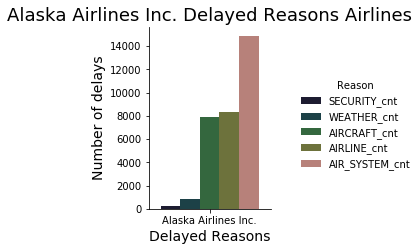

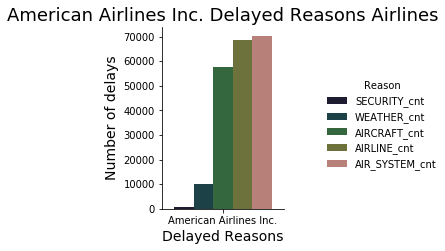

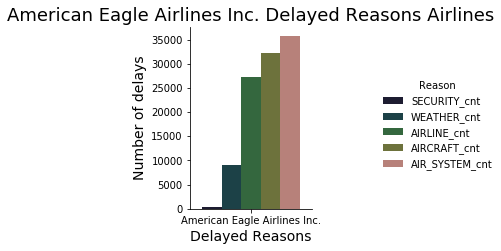

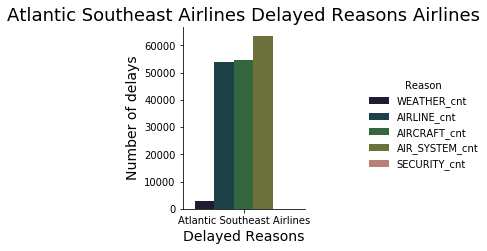

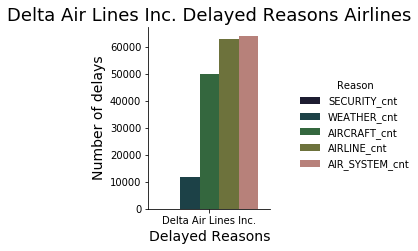

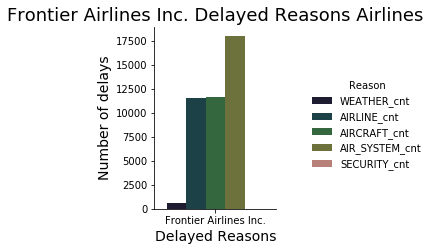

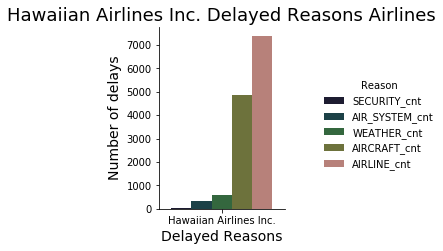

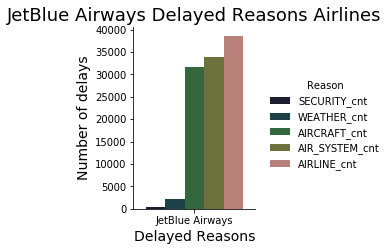

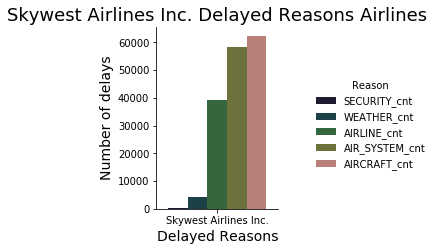

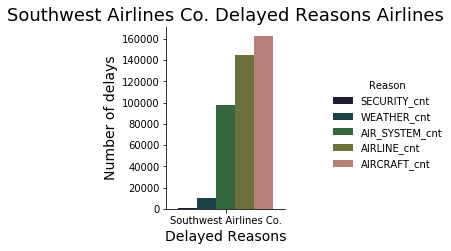

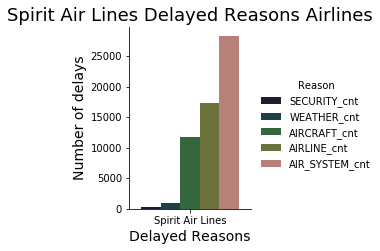

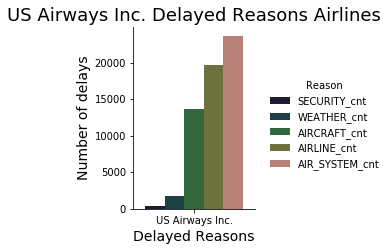

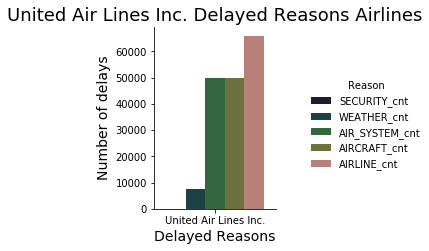

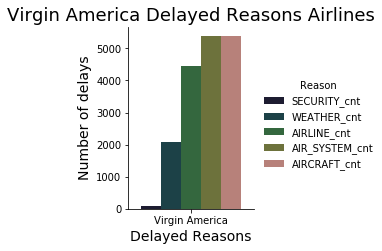

In [53]:
# plot the number of delayed per reason per airline

#fig, axs = plt.subplots(3,3)
for AL in pd.unique(ADRC['AIRLINE_NAME']):
    sns.set_palette("cubehelix", 8)
    ax= sns.catplot(x='AIRLINE_NAME', y='Flights_Number', hue='Reason', data=ADRC[ADRC.AIRLINE_NAME==AL]\
                   .sort_values('Flights_Number', ascending=[1]), kind='bar',legend=True)
    ax.set(xlabel=' ', ylabel=' ')
    ax.fig.set_size_inches( 3, 3)
    #plt.legend(loc='best')
    plt.title(AL+' Delayed Reasons Airlines',fontsize=18)
    plt.xlabel('Delayed Reasons',fontsize=14)
    plt.ylabel("Number of delays",fontsize=14)

;

#### 4.3.2. Total number of delayed minutes per reason per airline

In [54]:
# change the df structure to be : airline|delay_reason|total_minutes 
# ADRTM = Airline delay reasons total minutes 
ADRTM = pd.melt(DRS[['AIR_SYSTEM_Sum','SECURITY_Sum','AIRLINE_Sum','AIRCRAFT_Sum','WEATHER_Sum','AIRLINE_NAME']]\
               , id_vars='AIRLINE_NAME', var_name="Reason", value_name="Total_minutes")

print('number of records = ', len(ADRTM))
ADRTM.head(3)

number of records =  70


,AIRLINE_NAME,Reason,Total_minutes
0,Alaska Airlines Inc.,AIR_SYSTEM_Sum,301478.0
1,American Airlines Inc.,AIR_SYSTEM_Sum,1760561.0
2,American Eagle Airlines Inc.,AIR_SYSTEM_Sum,930774.0


''

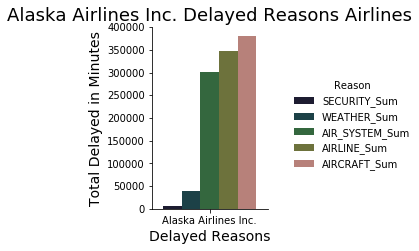

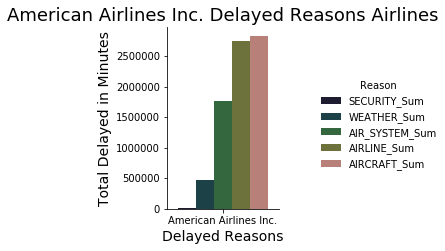

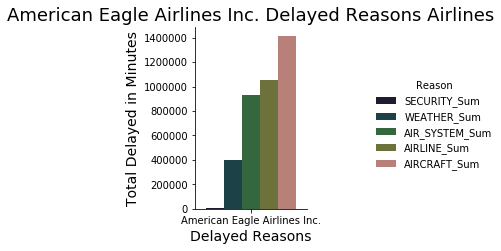

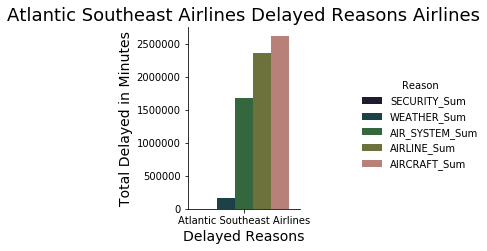

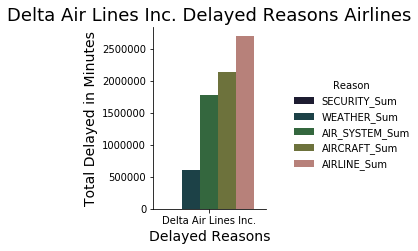

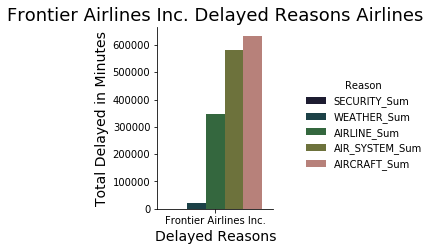

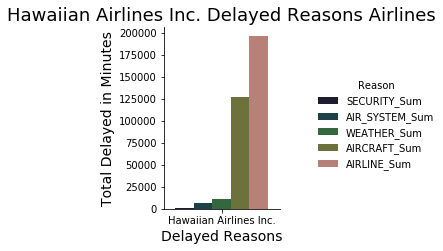

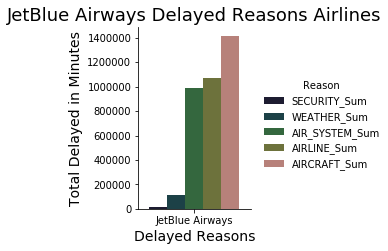

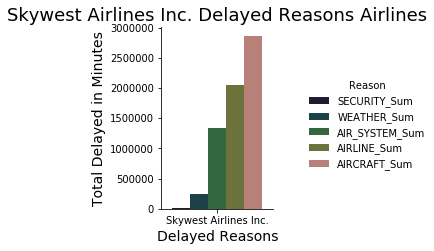

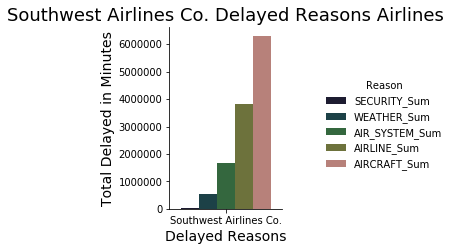

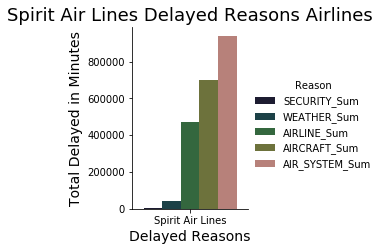

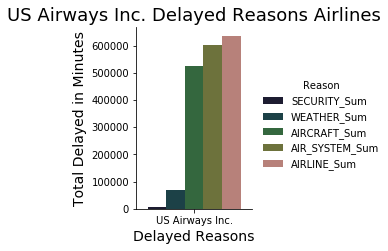

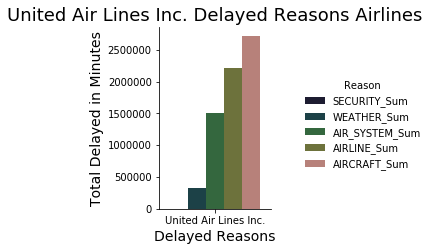

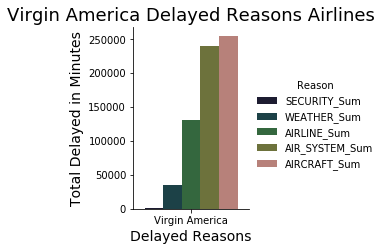

In [55]:
# plot total minutes of delayed per reason per airline

#fig, axs = plt.subplots(3,3)
for AL in pd.unique(ADRTM['AIRLINE_NAME']):
    sns.set_palette("cubehelix", 8)
    ax= sns.catplot(x='AIRLINE_NAME', y='Total_minutes', hue='Reason', data=ADRTM[ADRTM.AIRLINE_NAME==AL]\
                   .sort_values('Total_minutes', ascending=[1]), kind='bar',legend=True)
    ax.set(xlabel=' ', ylabel=' ')
    ax.fig.set_size_inches( 3, 3)
    #plt.legend(loc='best')
    plt.title(AL+' Delayed Reasons Airlines',fontsize=18)
    plt.xlabel('Delayed Reasons',fontsize=14)
    plt.ylabel("Total Delayed in Minutes",fontsize=14)

;

#### 4.3.3 Average number of delayed minutes per reason per airline

In [56]:
# change the df structure to be : airline|delay_reason|Avg_minutes 
# ADRAM = Airline delay reasons count 
ADRAM = pd.melt(DRS[['AIR_SYSTEM_Avg','SECURITY_Avg','AIRLINE_Avg','AIRCRAFT_Avg','WEATHER_Avg','AIRLINE_NAME']]\
               , id_vars='AIRLINE_NAME', var_name="Reason", value_name="Average_minutes")

print('number of records = ', len(ADRAM))
ADRAM.head(3)

number of records =  70


,AIRLINE_NAME,Reason,Average_minutes
0,Alaska Airlines Inc.,AIR_SYSTEM_Avg,13.487742
1,American Airlines Inc.,AIR_SYSTEM_Avg,13.513774
2,American Eagle Airlines Inc.,AIR_SYSTEM_Avg,15.372752


''

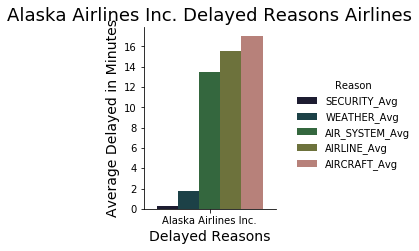

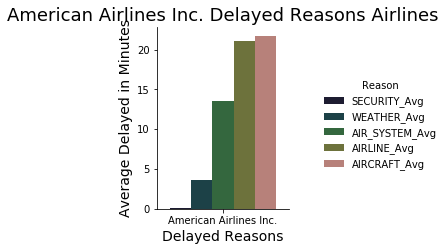

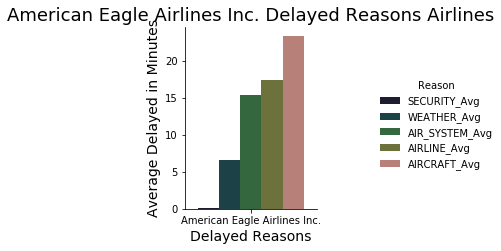

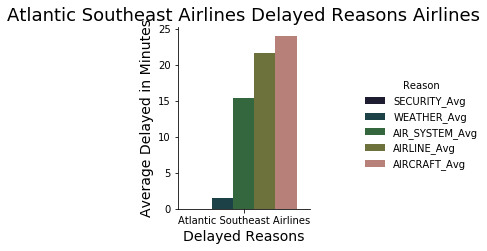

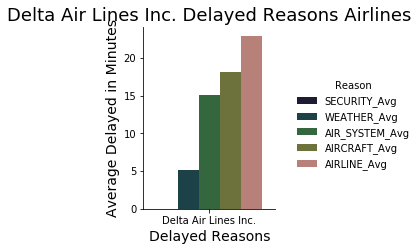

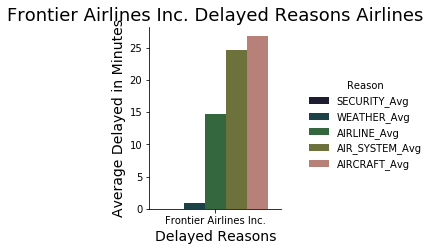

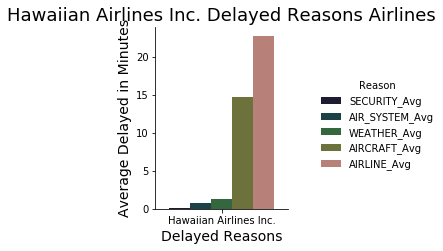

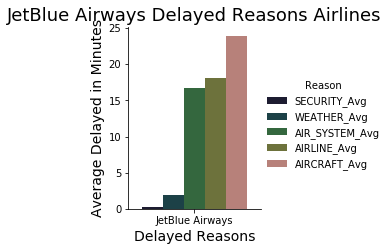

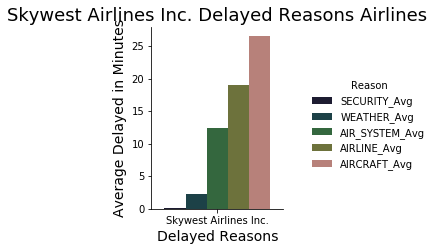

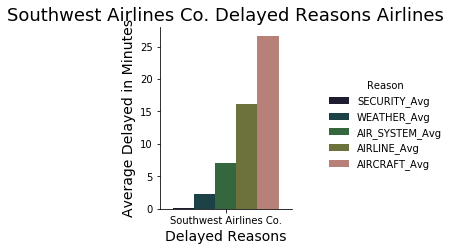

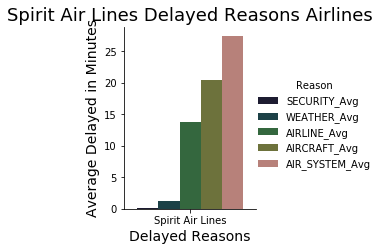

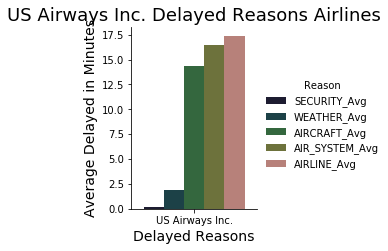

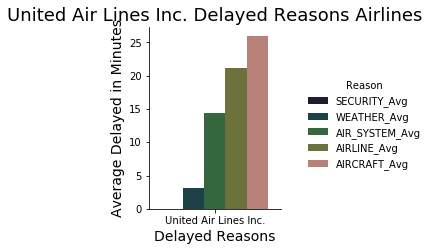

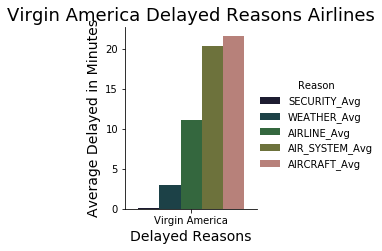

In [57]:
# plot total minutes of delayed per reason per airline

#fig, axs = plt.subplots(3,3)
for AL in pd.unique(ADRAM['AIRLINE_NAME']):
    sns.set_palette("cubehelix", 8)
    ax= sns.catplot(x='AIRLINE_NAME', y='Average_minutes', hue='Reason', data=ADRAM[ADRAM.AIRLINE_NAME==AL]\
                   .sort_values('Average_minutes', ascending=[1]), kind='bar',legend=True)
    ax.set(xlabel=' ', ylabel=' ')
    ax.fig.set_size_inches( 3, 3)
    #plt.legend(loc='best')
    plt.title(AL+' Delayed Reasons Airlines',fontsize=18)
    plt.xlabel('Delayed Reasons',fontsize=14)
    plt.ylabel("Average Delayed in Minutes",fontsize=14)

;



-------

### 4.4. Delay reasons in details

#### 4.4.1 - Delay Due Security

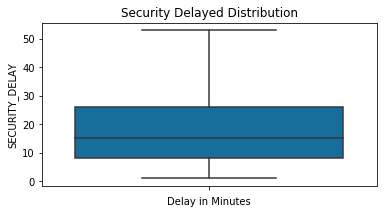

In [58]:
# plot delay minuets distribution/quartiles (boxplot)

plt.figure(figsize=(6, 3))
box_data = flights[flights.SECURITY_DELAY>0]['SECURITY_DELAY']
ax = sns.boxplot(x=box_data ,orient='v', palette="colorblind", showfliers=False) # showfliers=False
plt.title('Security Delayed Distribution')
plt.xlabel('Delay in Minutes');

''

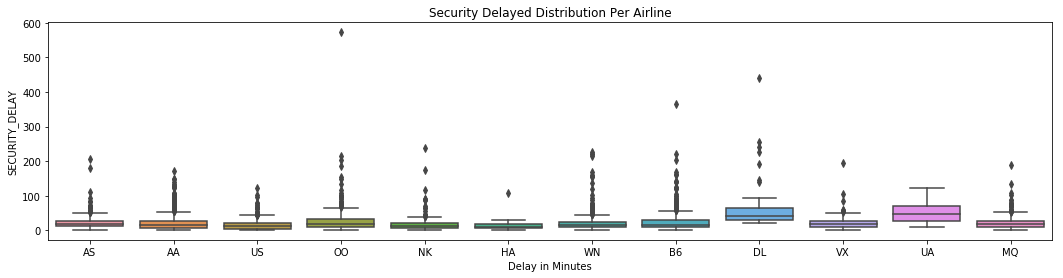

In [59]:
# plot delay minuets distribution/quartiles (boxplot) per airline

plt.figure(figsize=(18, 4))
box_data = flights[flights.SECURITY_DELAY>0][['SECURITY_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='SECURITY_DELAY', data=box_data)    # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Security Delayed Distribution Per Airline')
;

#### 4.4.2 Delay Due Aircraft

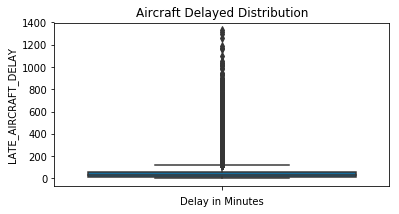

In [60]:
# plot delay minuets distribution/quartiles (boxplot)

plt.figure(figsize=(6, 3))
box_data = flights[flights.LATE_AIRCRAFT_DELAY>0]['LATE_AIRCRAFT_DELAY']
ax = sns.boxplot(x=box_data ,orient='v', palette="colorblind")  # showfliers=False
plt.title('Aircraft Delayed Distribution')
plt.xlabel('Delay in Minutes');

''

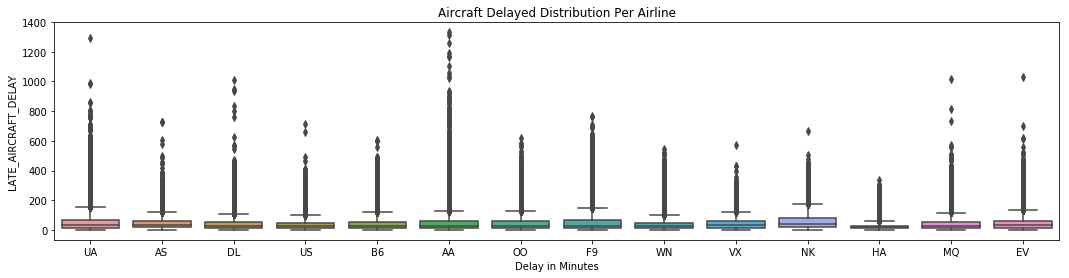

In [61]:
# plot delay minuets distribution/quartiles (boxplot) per airline

plt.figure(figsize=(18, 4))
box_data = flights[flights.LATE_AIRCRAFT_DELAY>0][['LATE_AIRCRAFT_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='LATE_AIRCRAFT_DELAY', data=box_data)  # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Aircraft Delayed Distribution Per Airline')
;

#### 4.4.3 Delay Due Weather

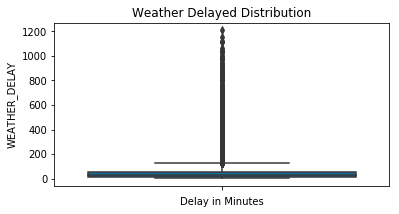

In [62]:
# plot delay minuets distribution/quartiles (boxplot)

plt.figure(figsize=(6, 3))
box_data = flights[flights.WEATHER_DELAY>0]['WEATHER_DELAY']
ax = sns.boxplot(x=box_data,orient='v', palette="colorblind")  # showfliers=False
plt.title('Weather Delayed Distribution')
plt.xlabel('Delay in Minutes');

''

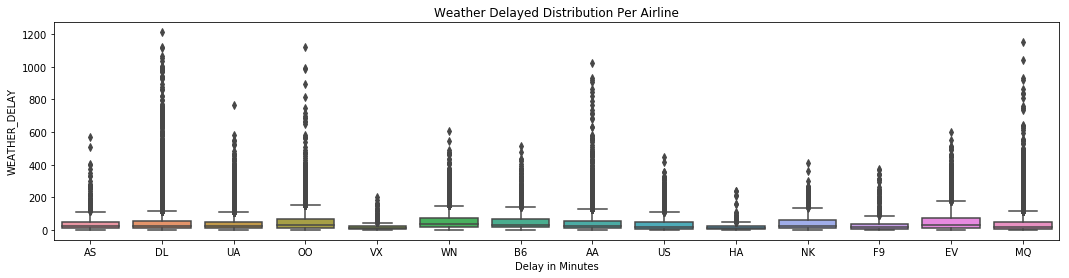

In [63]:
# plot delay minuets distribution/quartiles (boxplot) per airline

plt.figure(figsize=(18, 4))
box_data = flights[flights.WEATHER_DELAY>0][['WEATHER_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='WEATHER_DELAY', data=box_data)  # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Weather Delayed Distribution Per Airline')
;

#### 4.4.4. Delay Due Air System

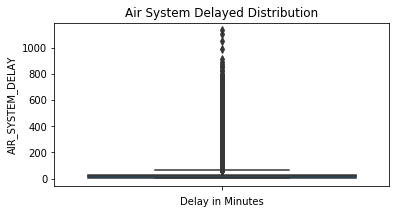

In [64]:
# plot delay minuets distribution/quartiles (boxplot)

plt.figure(figsize=(6, 3))
box_data = flights[flights.AIR_SYSTEM_DELAY>0]['AIR_SYSTEM_DELAY']
ax = sns.boxplot(x=box_data,orient='v', palette="colorblind")  # showfliers=False
plt.title('Air System Delayed Distribution')
plt.xlabel('Delay in Minutes');

''

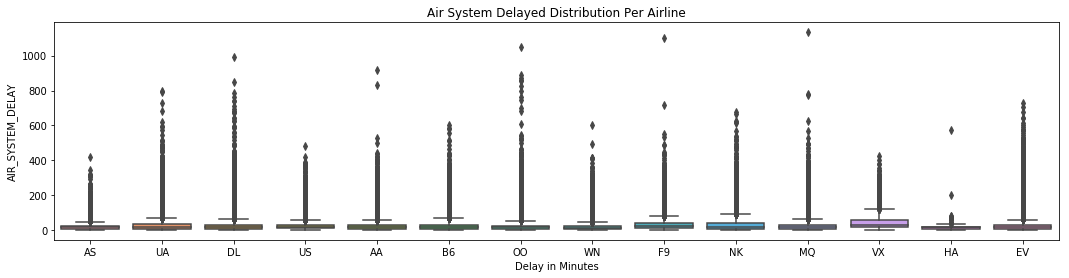

In [65]:
# plot delay minuets distribution/quartiles (boxplot) per airline

plt.figure(figsize=(18, 4))
box_data = flights[flights.AIR_SYSTEM_DELAY>0][['AIR_SYSTEM_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='AIR_SYSTEM_DELAY', data=box_data)  # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Air System Delayed Distribution Per Airline')
;

#### 4.4.5. Delay Due Airline

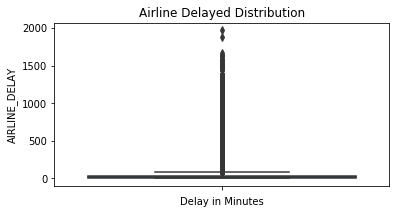

In [66]:
# plot delay minuets distribution/quartiles (boxplot)

plt.figure(figsize=(6, 3))
box_data = flights[flights.AIRLINE_DELAY>0]['AIRLINE_DELAY']
ax = sns.boxplot(x=box_data, orient='v', palette="colorblind")  # showfliers=False
plt.title('Airline Delayed Distribution')
plt.xlabel('Delay in Minutes');

''

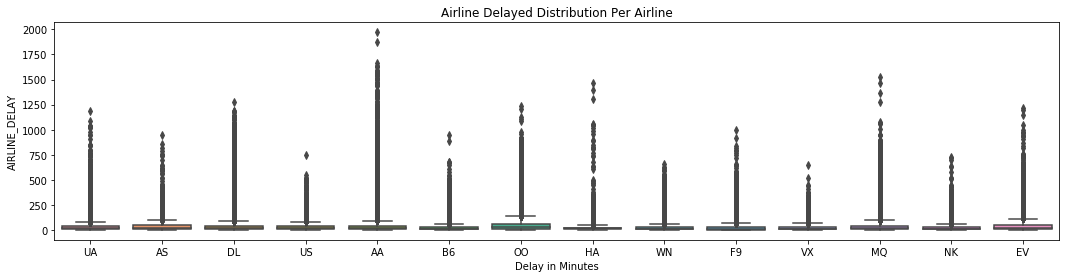

In [67]:
# plot delay minuets distribution/quartiles (boxplot) per airline

plt.figure(figsize=(18, 4))
box_data = flights[flights.AIRLINE_DELAY>0][['AIRLINE_DELAY','AIRLINE']]
ax=sns.boxplot(x='AIRLINE', y='AIRLINE_DELAY', data=box_data)  # showfliers=False
plt.xlabel('Delay in Minutes')
plt.title('Airline Delayed Distribution Per Airline')
;

## 4.5. Average delay per airline split by shift time (Morning, Afternoon, Noon, Night)

In [69]:
# FDDS: flights delay distribution split by day shift
FDDSS = pd.DataFrame(flights[flights['delayed']==1].groupby([flights.AIRLINE, flights.FlightsShift]).FLIGHT_NUMBER.count())
FDDSS.head(5)

FLIGHT_NUMBER
AIRLINE FlightsShift               
AA      Afternoon             50889
        Evening               46070
        Morninig              46841
        Night                 14116
AS      Afternoon              6729

In [70]:
# Sum of Delays per airline
Delay_Sum= flights[flights['delayed']==1].groupby(flights.AIRLINE).count()
Delay_Sum

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,AIRLINE NAME
AIRLINE,,,,,,,,,,,,,,,,,,,,,
AA,157916,157916,157916,157916,157916,157916,157916,157916,157916,157916,...,157916,157916,157916,157916,157916,157916,157916,157916,157916,157916
AS,26082,26082,26082,26082,26082,26082,26082,26082,26082,26082,...,26082,26082,26082,26082,26082,26082,26082,26082,26082,26082
B6,70555,70555,70555,70555,70555,70555,70555,70555,70555,70555,...,70555,70555,70555,70555,70555,70555,70555,70555,70555,70555
DL,152246,152246,152246,152246,152246,152246,152246,152246,152246,152246,...,152246,152246,151965,151965,152246,152246,152246,151916,151916,152246
EV,123504,123504,123504,123504,123504,123504,123504,123504,123504,123504,...,123504,123504,123399,123399,123504,123504,123504,123361,123361,123504
F9,26442,26442,26442,26442,26442,26442,26442,26442,26442,26442,...,26442,26442,26389,26389,26442,26442,26442,26392,26392,26442
HA,9119,9119,9119,9119,9119,9119,9119,9119,9119,9119,...,9119,9119,9119,9119,9119,9119,9119,9119,9119,9119
MQ,69644,69644,69644,69644,69644,69644,69644,69644,69644,69644,...,69644,69644,69644,69644,69644,69644,69644,69644,69644,69644
NK,38713,38713,38713,38713,38713,38713,38713,38713,38713,38713,...,38713,38713,38607,38607,38713,38713,38713,38608,38608,38713


In [72]:
# use unstack()  table
FDDSS = pd.DataFrame(flights[flights['delayed']==1].groupby(['AIRLINE NAME', 'FlightsShift']).count()['FLIGHT_NUMBER'].unstack())

FDDSS.head(3)

FlightsShift,Afternoon,Evening,Morninig,Night
AIRLINE NAME,,,,
Alaska Airlines Inc.,6729,7438,8861,3054
American Airlines Inc.,50889,46070,46841,14116
American Eagle Airlines Inc.,24661,17893,23018,4072


''

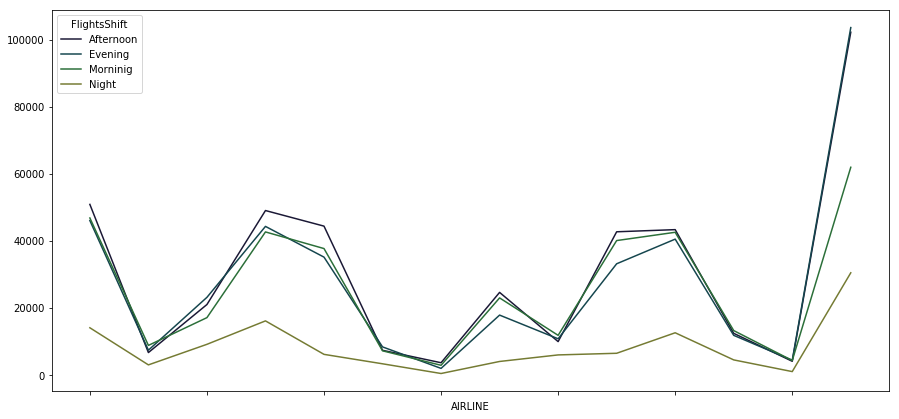

In [77]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
flights[flights['delayed']==1].groupby([flights.AIRLINE, flights.FlightsShift]).count()['FLIGHT_NUMBER'].unstack().plot(ax=ax)
;

## 4.6. Average Taxi_in per origion airport and Taxi_out per destination airport

### 4.6.1 Average Taxi_in per origion airport:

In [78]:
# Calculating average taxi_in per origion airport

TaxiInAverage=flights.groupby('ORIGIN_AIRPORT')[['TAXI_IN']].mean().reset_index()
TaxiInAverage.head(5)

,ORIGIN_AIRPORT,TAXI_IN
0,ABE,8.397493
1,ABI,10.640973
2,ABQ,7.661051
3,ABR,7.755798
4,ABY,7.855346


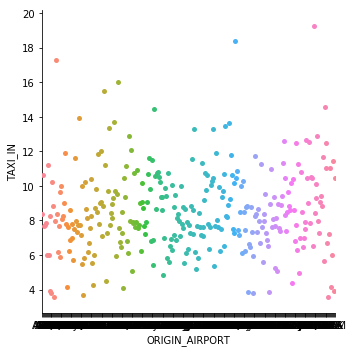

In [80]:
# Ploting average taxi_in per origion airport

sns.catplot(x ='ORIGIN_AIRPORT', y='TAXI_IN', data=TaxiInAverage) ;

#### Airports with average taxi_in more than 15 minutes:

In [81]:
TaxiInAverage[TaxiInAverage['TAXI_IN'] >= 15]

,ORIGIN_AIRPORT,TAXI_IN
15,ALO,17.289515
68,CMI,15.500227
83,DBQ,16.009404
212,MQT,18.357143
298,SUX,19.254630


### 4.6.2 Average Taxi_out per destination airport:

In [82]:
# Calculating average taxi_out per destination airport

TaxiOutAverage=flights.groupby('DESTINATION_AIRPORT')[['TAXI_OUT']].mean().reset_index()
TaxiOutAverage.head(5)

,DESTINATION_AIRPORT,TAXI_OUT
0,ABE,18.931468
1,ABI,15.106067
2,ABQ,14.745746
3,ABR,18.210598
4,ABY,17.991632


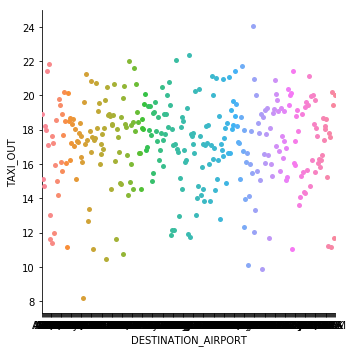

In [83]:
# Ploting average taxi_out per destination airport

sns.catplot(x ='DESTINATION_AIRPORT', y='TAXI_OUT', data=TaxiOutAverage);

#### Airports with average taxi_out later than 25 minutes

In [84]:
TaxiOutAverage[TaxiOutAverage['TAXI_OUT'] >=25];

## 4.7. Count delays per season:


In [86]:
# FDDSBS: flights delay distribution split by season
FDDSBS = pd.DataFrame(flights[flights['delayed']==1].groupby([flights.SEASON, flights.MONTH]).delayed.count())
FDDSBS.head(12)

delayed
SEASON MONTH         
Autumn 9        73548
       10       75308
       11       87146
Spring 3       117165
       4       100328
       5       108765
Summer 6       138133
       7       129835
       8       114837
Winter 1       113752
       2       113369
       12      118069

In [87]:
# Sum of Delays per season
Season_Delay_Sum = flights[flights['delayed']==1].groupby(flights.SEASON).count()

Season_Delays = Season_Delay_Sum[['delayed']]

Season_Delays.insert(loc=1, column='Season', value=['Autumn', 'Spring', 'Summer', 'Winter']) 
Season_Delays

,delayed,Season
SEASON,,
Autumn,236002,Autumn
Spring,326258,Spring
Summer,382805,Summer
Winter,345190,Winter


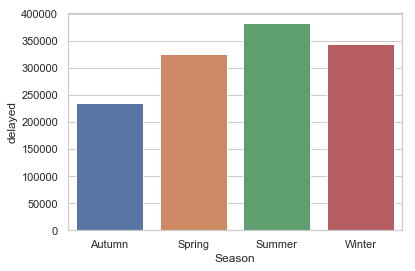

In [88]:
# Plotting Sum of Delays per season
sns.set(style="whitegrid")

ax = sns.barplot(x=Season_Delays.Season, y="delayed", data=Season_Delays)